In [ ]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state=1)

EDA

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(54000, 28, 28)
(10000, 28, 28)
(6000, 28, 28)
(54000,)
(10000,)
(6000,)


In [ ]:
x_train  = x_train.reshape(54000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)
x_val  = x_val.reshape(6000,28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(54000, 28, 28, 1)
(10000, 28, 28, 1)
(6000, 28, 28, 1)
(54000,)
(10000,)
(6000,)


with above set of codes we infer that there are 54000,10000,6000 values in x_train , x_test , x_val respectively. Each sample is of 28*28 pixels.

In [ ]:
  label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle-boot']

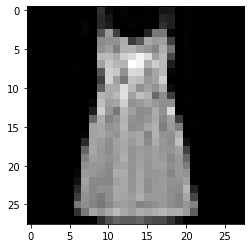

Dress


In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[65].reshape(28,28),cmap = 'gray')
plt.show()
print(label[y_train[65]])

In [ ]:
y_train

array([3, 9, 1, ..., 1, 1, 1], dtype=uint8)

from the above output we infer that the labels of the samples are stored as numpy arrrays with dtype of uint8

Normalization

In [ ]:
print(x_train[3].min())
print(x_train[3].max())

0
255


the values are between 0 and 255

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [ ]:
print(x_train[3].min())
print(x_train[3].max())

0.0
1.0


after normalization the values are scaled between 0 & 1

In [ ]:
[x_train][0].shape

(54000, 28, 28, 1)

In [ ]:
y_train[0].shape

()

MODEL

In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [ ]:
history  = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 15s 4ms/step - loss: 0.6041 - accuracy: 0.7813 - val_loss: 0.4591 - val_accuracy: 0.8317
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4127 - accuracy: 0.8480 - val_loss: 0.3980 - val_accuracy: 0.8525
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3564 - accuracy: 0.8684 - val_loss: 0.3590 - val_accuracy: 0.8688
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3178 - accuracy: 0.8823 - val_loss: 0.3374 - val_accuracy: 0.8790
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2906 - accuracy: 0.8912 - val_loss: 0.3281 - val_accuracy: 0.8808
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9004 - val_loss: 0.3121 - val_accuracy: 0.8862
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2467 - accuracy: 0.9076 - val_loss: 0.3231 - val_accuracy

In [ ]:
model.save('model1.hdf5')

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
history = tf.keras.models.load_model('/content/model1.hdf5')

In [ ]:
history.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.8882


[0.32821381092071533, 0.8881999850273132]

In [ ]:
plot_hist(history)